## Assignment 2

- Leo Thomasson (#261167871)
- Ella Lukasiewicz (#261169106)
- Eve Rabin (#261160750)


In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("spambase.data", header=None) #put path to your file or put spambase.data in working direc
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


##### Inspecting the dataset
There are 57 features and 1 Class (our target). All 57 features are continuous, while our Class is Binary. This represents the variable we are trying to predict from all of the features (1 for spam or 0 for not spam). Of the 57 features :

- 55 features of type float
  - 48 represent word frequencies (word_freq_...)
  - 6 represent char frequencies (char_freq_.)
  - 1 represents capital_run_length_average
- 2 features of type int
  - capital_run_length_longest, and capital_run_length_total

In [394]:
# get feature names
df_names = pd.read_csv(
    "spambase.names",
    header=None,
    comment="|",      # ignore comment lines
    skip_blank_lines=True
)

# Keep only lines that define features (contain :)
df_names = df_names[df_names[0].str.contains(":")]

# Extract feature names (text before :)
feature_names = df_names[0].str.split(":", expand=True)[0].tolist()

df.columns = feature_names + ["Class"]
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Check for missing data - None

In [395]:
print(df.isna().sum().sum())  # total missing values
assert df.isna().sum().sum() == 0


0


We separate the dataset into feature matrix X and target vector y, converting them to NumPy arrays with appropriate numeric types to ensure compatibility with the learning algorithms.

In [396]:
X = df.iloc[:, :-1].to_numpy(dtype=np.float64)
y = df.iloc[:, -1].to_numpy(dtype=np.int64)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4601, 57)
y shape: (4601,)


4601 samples and labels 

Split data in 5% train and 95% test 

In [ ]:
RANDOM_SEED = 2026
rng = np.random.default_rng(RANDOM_SEED)

n = X.shape[0]
indices = np.arange(n)
rng.shuffle(indices)

# 5% train
n_train = int(np.round(0.05 * n))

train_idx = indices[:n_train]
test_idx = indices[n_train:]

X_train = X[train_idx]
y_train = y[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]

#before standardisation
X_train_raw = X_train.copy() # copy for task 2,3,4 
y_train_raw = y_train.copy() # copy for task 2,3,4 
X_test_raw  = X_test.copy() # copy for task 2, 3,4 
y_test_raw = y_test.copy() # copy for task 2, 3,4 

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])
print("Train spam rate:", y_train.mean())
print("Test spam rate:", y_test.mean())


Train size: 230
Test size: 4371
Train spam rate: 0.3869565217391304
Test spam rate: 0.39441775337451385


Check if standardisation is needed

In [431]:
# Mean of each feature
feature_means = df.mean()

# Variance of each feature (population variance)
feature_variances = df.var(ddof=0)

# Combine into a single DataFrame for easy inspection
stats = pd.DataFrame({
    "mean": feature_means,
    "variance": feature_variances
})

print(stats)

                                  mean       variance
word_freq_make                0.104553       0.093223
word_freq_address             0.213015       1.665222
word_freq_all                 0.280656       0.254105
word_freq_3d                  0.065425       1.946024
word_freq_our                 0.312223       0.452175
word_freq_over                0.095901       0.074963
word_freq_remove              0.114208       0.153193
word_freq_internet            0.105295       0.160823
word_freq_order               0.090067       0.077610
word_freq_mail                0.239413       0.415619
word_freq_receive             0.059824       0.040611
word_freq_will                0.541702       0.742363
word_freq_people              0.093930       0.090603
word_freq_report              0.058626       0.112324
word_freq_addresses           0.049205       0.066985
word_freq_free                0.248848       0.681784
word_freq_business            0.142586       0.197142
word_freq_email             

Clearly, the features have not been standardized. No means = 0 and no STDs = 1. We can standardise on the train set only (no data leakage and we made copies above before standardisation for task 2, 3 adn 4)

In [398]:

mu = X_train.mean(axis=0)                 # per-feature mean on TRAIN only
sigma = X_train.std(axis=0, ddof=0)       # per-feature std on TRAIN only
sigma[sigma == 0] = 1.0                   # avoid divide-by-zero

X_train_std = (X_train - mu) / sigma
X_test_std  = (X_test  - mu) / sigma


print("Train mean:", X_train_std.mean())
print("Train std:", X_train_std.std())

y_train = np.asarray(y_train).astype(int).reshape(-1)
y_test  = np.asarray(y_test).astype(int).reshape(-1)

Train mean: 1.1923676725188561e-17
Train std: 1.0


In [399]:
n_train, d = X_train_std.shape
print("n_train:", n_train, "features:", d)


n_train: 230 features: 57


#### Correlation matrix, everything + zoomed in 

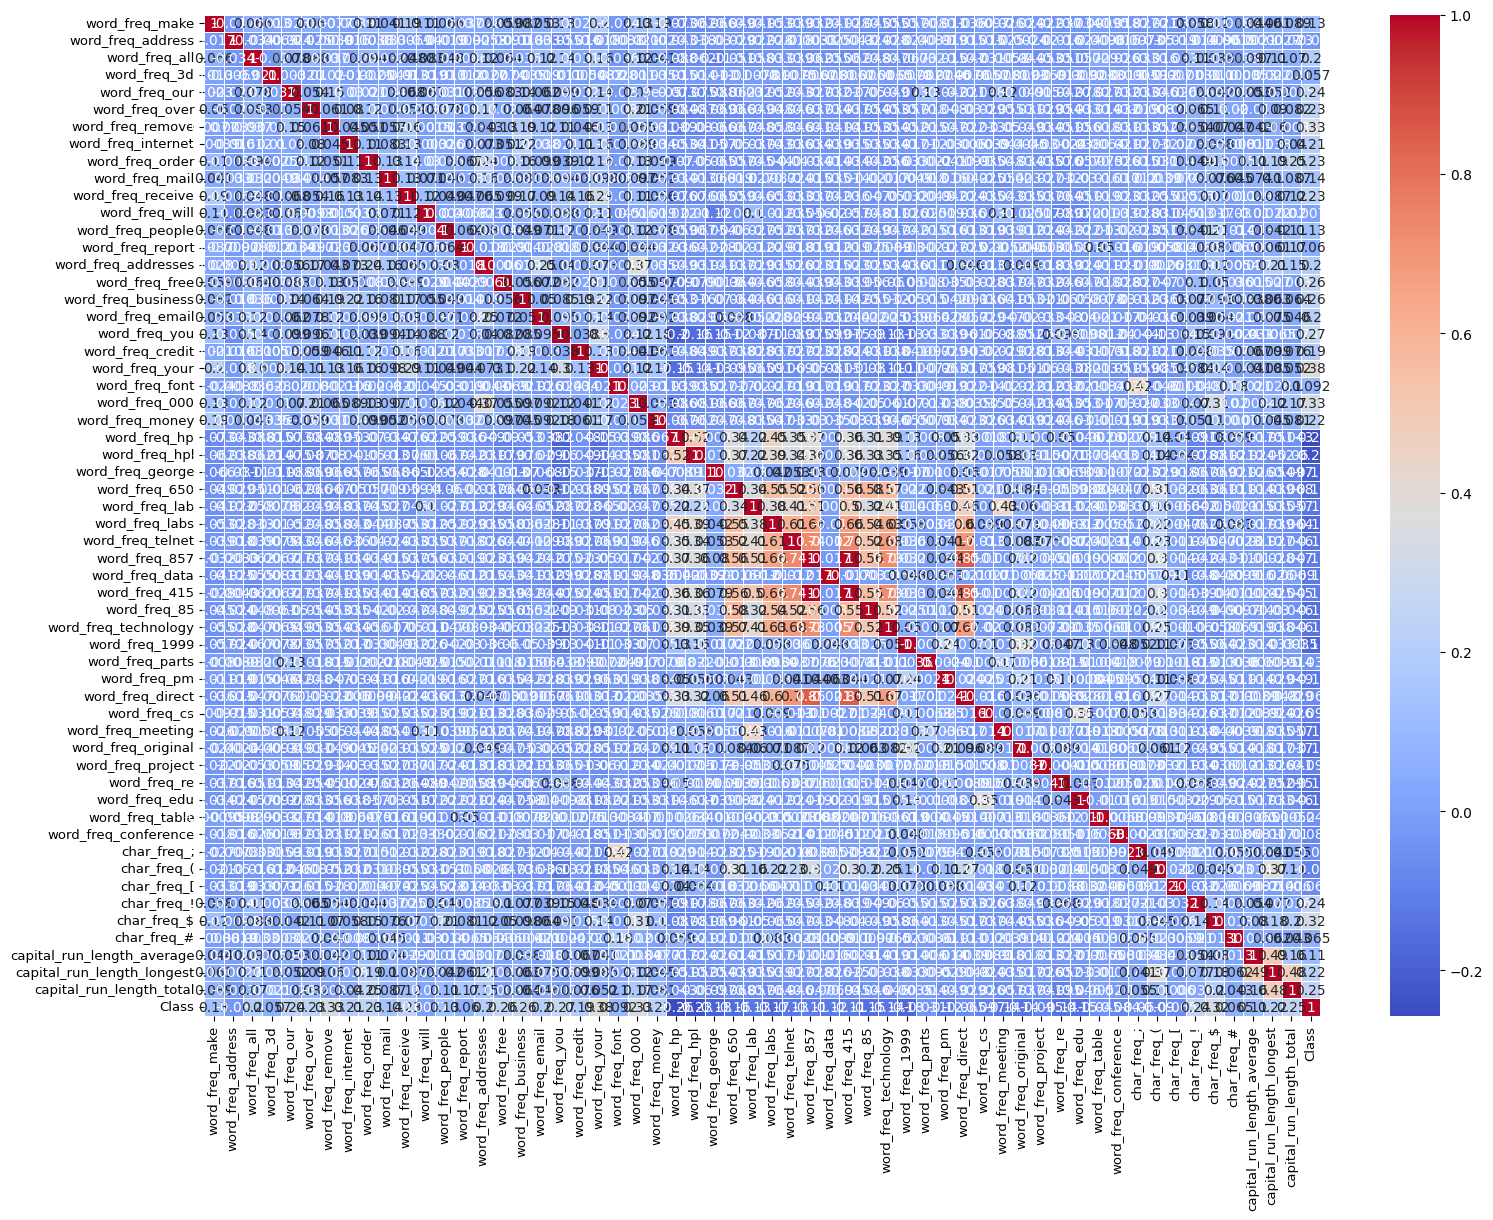

In [400]:
df_train = pd.DataFrame(X_train, columns=feature_names)
df_train['class'] = y_train
corr = df_train.corr()

#correlation Matrix to better understand releationships between features
plt.figure(figsize=(18,13))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5, cmap='coolwarm', annot=True)
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.show()

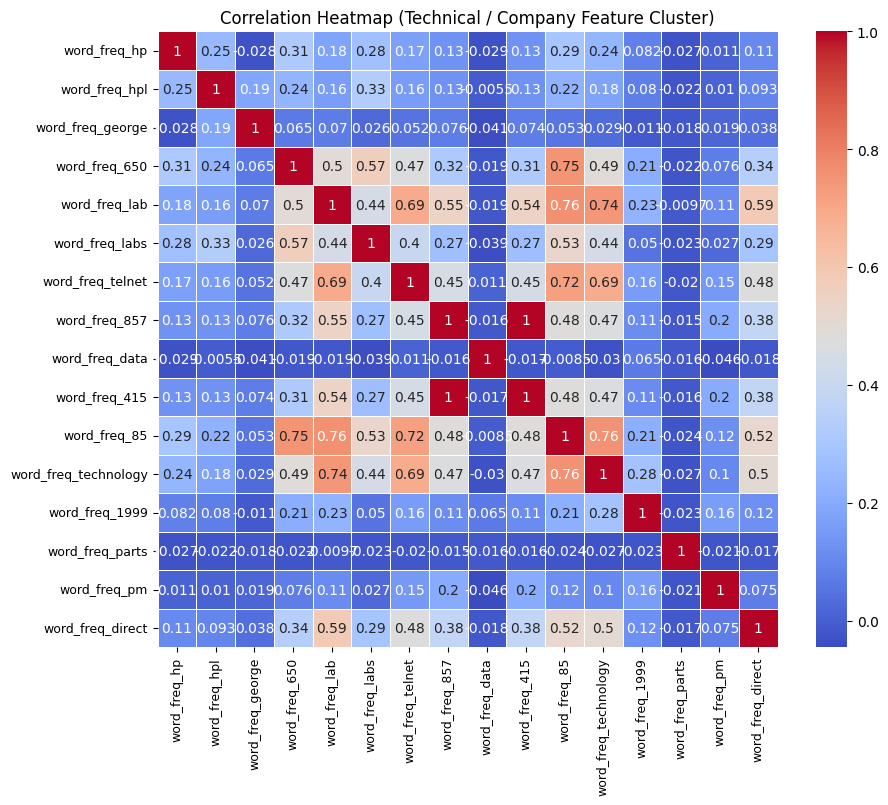

In [401]:
selected_features = [
    'word_freq_hp',
    'word_freq_hpl',
    'word_freq_george',
    'word_freq_650',
    'word_freq_lab',
    'word_freq_labs',
    'word_freq_telnet',
    'word_freq_857',
    'word_freq_data',
    'word_freq_415',
    'word_freq_85',
    'word_freq_technology',
    'word_freq_1999',
    'word_freq_parts',
    'word_freq_pm',
    'word_freq_direct'
]

df_zoom_cluster = df_train[selected_features]
plt.figure(figsize=(10, 8))

corr_cluster = df_zoom_cluster.corr()

sns.heatmap(
    corr_cluster,
    xticklabels=corr_cluster.columns.values,
    yticklabels=corr_cluster.columns.values,
    linewidths=.5,
    cmap='coolwarm',
    annot=True
)

plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation Heatmap (Technical / Company Feature Cluster)")
plt.show()


In [402]:
print(df_train[selected_features + ['class']].corr()['class'])


word_freq_hp           -0.268680
word_freq_hpl          -0.216655
word_freq_george       -0.206401
word_freq_650          -0.202223
word_freq_lab          -0.213565
word_freq_labs         -0.158786
word_freq_telnet       -0.197248
word_freq_857          -0.152552
word_freq_data         -0.147572
word_freq_415          -0.144239
word_freq_85           -0.237113
word_freq_technology   -0.228551
word_freq_1999         -0.245466
word_freq_parts        -0.062838
word_freq_pm           -0.192602
word_freq_direct       -0.147314
class                   1.000000
Name: class, dtype: float64


#### Task 1: Logistic Regression with SGD

Convention Convention used: we use L_reg(w,b) = L(w,b) + 𝜆/2 (||w||^2)2, so the L2 gradient contribution is 𝜆w.

In [403]:
def sigmoid(z):
    # stable sigmoid
    z = np.clip(z, -35, 35)
    return 1.0 / (1.0 + np.exp(-z))

def cross_entropy(y, p, eps=1e-12):
    p = np.clip(p, eps, 1 - eps)
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def weight_norm(w):
    return np.linalg.norm(w)

In [404]:
class LogisticRegressionSGD:

    def __init__(self, lr=1e-2, epochs=100, batch_size=16, l2=0.0, seed=RANDOM_SEED): #default parameters
        self.lr = float(lr)
        self.epochs = int(epochs)
        self.batch_size = int(batch_size)
        self.l2 = float(l2)
        self.seed = int(seed)

        self.w = None
        self.b = None

        # histories
        self.train_ce_history = []
        self.test_ce_history = []
        self.train_acc_history = []
        self.test_acc_history = []
        self.step_ce_history = []     
        self.w_norm_history = []      

    def fit(self, X, y, X_test=None, y_test=None):
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64).reshape(-1)
        n, d = X.shape

        rng_local = np.random.default_rng(self.seed) 

        self.w = np.zeros(d, dtype=np.float64)
        self.b = 0.0

        self.train_ce_history = []
        self.test_ce_history = []
        self.train_acc_history = []
        self.test_acc_history = []
        self.step_ce_history = []
        self.w_norm_history = []

        for ep in range(self.epochs):
            idx = rng_local.permutation(n) # shuffle after each epoch
            Xs, ys = X[idx], y[idx]

            # mini-batch updates
            for start in range(0, n, self.batch_size):
                end = min(start + self.batch_size, n)
                Xb, yb = Xs[start:end], ys[start:end]

                z = Xb @ self.w + self.b
                p = sigmoid(z)

                diff = (p - yb)
                B = len(yb)

                grad_w = (Xb.T @ diff) / B + self.l2 * self.w
                grad_b = np.sum(diff) / B

                self.w -= self.lr * grad_w
                self.b -= self.lr * grad_b

                self.step_ce_history.append(cross_entropy(yb, p))

            # end epoch: evaluate full train
            p_train = sigmoid(X @ self.w + self.b)
            yhat_train = (p_train >= 0.5).astype(int)

            self.train_ce_history.append(cross_entropy(y, p_train))
            self.train_acc_history.append(accuracy(y, yhat_train))
            self.w_norm_history.append(weight_norm(self.w)) # to see effects of L2 regularisation 

            # full test if given
            if X_test is not None and y_test is not None:
                Xt = np.asarray(X_test, dtype=np.float64)
                yt = np.asarray(y_test, dtype=np.float64).reshape(-1)

                p_test = sigmoid(Xt @ self.w + self.b)
                yhat_test = (p_test >= 0.5).astype(int)

                self.test_ce_history.append(cross_entropy(yt, p_test))
                self.test_acc_history.append(accuracy(yt, yhat_test))

        return self

    def predict_proba(self, X):
        X = np.asarray(X, dtype=np.float64)
        return sigmoid(X @ self.w + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [405]:
# Default parameters
BASE_B = 16
BASE_LR = 1e-2
BASE_EPOCHS = 100

L2_REC = 1e-3   # recommended in assignment
L2_STRONG = 1e-2 # another test
L2_NONE = 0.0

# Baseline: compare no-reg vs L2 at recommended lambda + other lambda
model_base_noreg    = LogisticRegressionSGD(lr=BASE_LR, epochs=BASE_EPOCHS, batch_size=BASE_B, l2=L2_NONE,   seed=RANDOM_SEED)
model_base_l2_rec   = LogisticRegressionSGD(lr=BASE_LR, epochs=BASE_EPOCHS, batch_size=BASE_B, l2=L2_REC,    seed=RANDOM_SEED)
model_base_l2_strong= LogisticRegressionSGD(lr=BASE_LR, epochs=BASE_EPOCHS, batch_size=BASE_B, l2=L2_STRONG, seed=RANDOM_SEED)

model_base_noreg.fit(X_train_std, y_train, X_test_std, y_test)
model_base_l2_rec.fit(X_train_std, y_train, X_test_std, y_test)
model_base_l2_strong.fit(X_train_std, y_train, X_test_std, y_test)

# Batch-size effect (SGD vs mini-batch) 
B_LIST = [1, 16, 64]
models_batch = {}
for B in B_LIST:
    m = LogisticRegressionSGD(lr=BASE_LR, epochs=BASE_EPOCHS, batch_size=B, l2=0.0, seed=RANDOM_SEED)
    m.fit(X_train_std, y_train, X_test_std, y_test)
    models_batch[B] = m


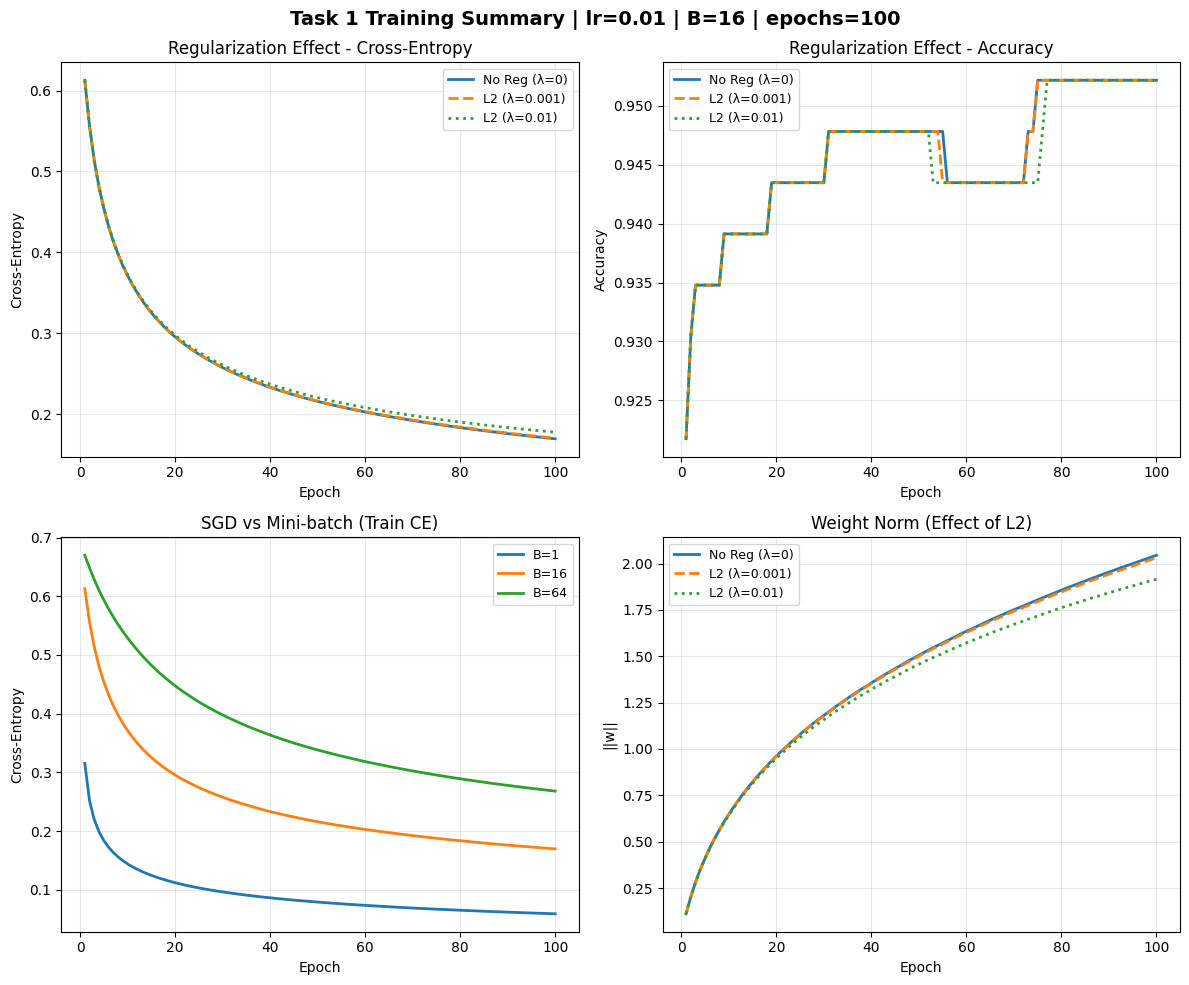

In [406]:

epochs = np.arange(1, BASE_EPOCHS + 1)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

ax = axes[0, 0]
ax.plot(epochs, model_base_noreg.train_ce_history,
        label='No Reg (λ=0)', linewidth=2)
ax.plot(epochs, model_base_l2_rec.train_ce_history,
        label=f'L2 (λ={L2_REC})', linestyle='--', linewidth=2)
ax.plot(epochs, model_base_l2_strong.train_ce_history,
        label=f'L2 (λ={L2_STRONG})', linestyle=':', linewidth=2)


ax.set_title('Regularization Effect - Cross-Entropy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross-Entropy')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)


ax = axes[0, 1]
ax.plot(epochs, model_base_noreg.train_acc_history,
        label='No Reg (λ=0)', linewidth=2)
ax.plot(epochs, model_base_l2_rec.train_acc_history,
        label=f'L2 (λ={L2_REC})', linestyle='--', linewidth=2)
ax.plot(epochs, model_base_l2_strong.train_acc_history,
        label=f'L2 (λ={L2_STRONG})', linestyle=':', linewidth=2)

ax.set_title('Regularization Effect - Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)


ax = axes[1, 0]
for B in sorted(models_batch.keys()):
    ax.plot(epochs, models_batch[B].train_ce_history,
            label=f'B={B}', linewidth=2)

ax.set_title('SGD vs Mini-batch (Train CE)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross-Entropy')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)


ax = axes[1, 1]
ax.plot(epochs, model_base_noreg.w_norm_history,
        label='No Reg (λ=0)', linewidth=2)
ax.plot(epochs, model_base_l2_rec.w_norm_history,
        label=f'L2 (λ={L2_REC})', linestyle='--', linewidth=2)
ax.plot(epochs, model_base_l2_strong.w_norm_history,
        label=f'L2 (λ={L2_STRONG})', linestyle=':', linewidth=2)

ax.set_title('Weight Norm (Effect of L2)')
ax.set_xlabel('Epoch')
ax.set_ylabel('||w||')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)


plt.suptitle(
    f'Task 1 Training Summary | lr={BASE_LR} | B={BASE_B} | epochs={BASE_EPOCHS}',
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


In [407]:
def summarize_model_table(models_dict, X_train, y_train, X_test, y_test):

    rows = []

    for name, m in models_dict.items():
        # Cross-entropy from history
        train_ce = m.train_ce_history[-1]
        test_ce = m.test_ce_history[-1]

        # Accuracy (computed to be safe)
        yhat_train = m.predict(X_train)
        yhat_test  = m.predict(X_test)

        train_acc = np.mean(yhat_train == y_train)
        test_acc  = np.mean(yhat_test == y_test)

        # Weight norm (optional but useful for L2 discussion)
        w_norm = np.linalg.norm(m.w)

        rows.append({
            "Model": name,
            "Train CE": train_ce,
            "Test CE": test_ce,
            "Train Acc": train_acc,
            "Test Acc": test_acc,
            "Weight Norm": w_norm
        })

    df = pd.DataFrame(rows)
    return df

models_dict = {
    "No reg (λ=0)": model_base_noreg,
    "L2 (λ=1e-3)": model_base_l2_rec,
    "L2 (λ=1e-2)": model_base_l2_strong
}

results_df = summarize_model_table(
    models_dict,
    X_train_std, y_train,
    X_test_std, y_test
)

results_df.round(4)


,Model,Train CE,Test CE,Train Acc,Test Acc,Weight Norm
0,No reg (λ=0),0.1698,0.3020,0.9522,0.9064,2.0447
1,L2 (λ=1e-3),0.1706,0.3019,0.9522,0.9064,2.0311
2,L2 (λ=1e-2),0.1779,0.3015,0.9522,0.9080,1.9155


#### Task 2: Hyperparameter Tuning with K-Fold Cross-Validation

In [408]:
def kfold_indices(n, k=3, seed=2026, shuffle=True):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    if shuffle:
        rng.shuffle(idx)
    folds = np.array_split(idx, k)
    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])
        yield train_idx, val_idx

def standardize_train_val(X_tr, X_val):
    mu = X_tr.mean(axis=0)
    sigma = X_tr.std(axis=0, ddof=0)
    sigma[sigma == 0] = 1.0
    return (X_tr - mu) / sigma, (X_val - mu) / sigma

In [ ]:
def cv_eval_setting(
    X_train_raw, y_train_raw,
    k, lr, batch_size, epochs,
    l2=0.0,
    seed=2026
):
    fold_train_ce, fold_val_ce = [], []
    fold_train_acc, fold_val_acc = [], []

    X_train_raw = np.asarray(X_train_raw, dtype=np.float64)
    y_train_raw = np.asarray(y_train_raw).astype(int).reshape(-1)

    n = X_train_raw.shape[0]

    for tr_idx, val_idx in kfold_indices(n, k=k, seed=seed, shuffle=True):
        X_tr_raw = X_train_raw[tr_idx]
        y_tr     = y_train_raw[tr_idx]
        X_val_raw = X_train_raw[val_idx]
        y_val     = y_train_raw[val_idx]

        X_tr_std, X_val_std = standardize_train_val(X_tr_raw, X_val_raw)

        m = LogisticRegressionSGD(
            lr=lr,
            epochs=epochs,
            batch_size=batch_size,
            l2=l2,
            seed=seed,
        )

        m.fit(X_tr_std, y_tr, X_val_std, y_val)

        fold_train_ce.append(m.train_ce_history[-1])
        fold_val_ce.append(m.test_ce_history[-1])
        fold_train_acc.append(m.train_acc_history[-1])
        fold_val_acc.append(m.test_acc_history[-1])

    return {
        "K": int(k),
        "B": int(batch_size),
        "lr": float(lr),
        "epochs": int(epochs),
        "lambda": float(l2),

        "train_CE_mean": float(np.mean(fold_train_ce)),
        "train_CE_std":  float(np.std(fold_train_ce, ddof=1)) if k > 1 else 0.0,
        "val_CE_mean":   float(np.mean(fold_val_ce)),
        "val_CE_std":    float(np.std(fold_val_ce, ddof=1)) if k > 1 else 0.0,

        "train_acc_mean": float(np.mean(fold_train_acc)),
        "train_acc_std":  float(np.std(fold_train_acc, ddof=1)) if k > 1 else 0.0,
        "val_acc_mean":   float(np.mean(fold_val_acc)),
        "val_acc_std":    float(np.std(fold_val_acc, ddof=1)) if k > 1 else 0.0,
    }


In [410]:
#petit warning it takes 6.5 minutes to run with k from 3 to 7 (reduce range if you want, k=6 is the best setting fyi)

K_LIST = list(range(3, 7))              # 3..7, list(range(3, 8))  
batch_grid = [4, 8, 12, 16, 24, 32, 40, 50, 64, 96] # removed 1 for training purposes
lr_grid    = [1,1e-1, 1e-2, 1e-3, 1e-4]
epoch_grid = [50, 60, 75, 85, 100, 125, 150, 175, 200, 250, 300]


L2_FOR_TASK2 = 1e-3
cv_results = []

total = (
    len(K_LIST)
    * len(batch_grid)
    * len(lr_grid)
    * len(epoch_grid)
)

done = 0

for K in K_LIST:
    for B in batch_grid:
        for lr in lr_grid:
            for ep in epoch_grid:

                res = cv_eval_setting(
                X_train_raw=X_train_raw,
                y_train_raw=y_train_raw,
                k=K, lr=lr, batch_size=B, epochs=ep,
                l2=L2_FOR_TASK2,
                seed=RANDOM_SEED                    
                )
                
                cv_results.append(res)

                done += 1
                if done % 100 == 0 or done == total:
                    print(f"Progress: {done}/{total}")


Progress: 100/2200
Progress: 200/2200
Progress: 300/2200
Progress: 400/2200
Progress: 500/2200
Progress: 600/2200
Progress: 700/2200
Progress: 800/2200
Progress: 900/2200
Progress: 1000/2200
Progress: 1100/2200
Progress: 1200/2200
Progress: 1300/2200
Progress: 1400/2200
Progress: 1500/2200
Progress: 1600/2200
Progress: 1700/2200
Progress: 1800/2200
Progress: 1900/2200
Progress: 2000/2200
Progress: 2100/2200
Progress: 2200/2200


In [426]:

cv_df = pd.DataFrame(cv_results)

best_overall = cv_df.loc[[cv_df['val_CE_mean'].idxmin()]]


cols = [
    "K", "B", "lr", "epochs", "lambda",
    "train_CE_mean", "train_CE_std",
    "val_CE_mean", "val_CE_std",
    "train_acc_mean", "train_acc_std",
    "val_acc_mean", "val_acc_std"
]

best_table = best_overall[cols].round(4)

print("\nBest overall setting: \n")

print(best_table.to_string(index=False))

best_per_k = (
    cv_df.loc[
        cv_df.groupby('K')['val_CE_mean'].idxmin()
    ]
    .reset_index(drop=True)
)

print("\nBest setting for each K:")
print(best_per_k)

best_k_row = best_per_k.loc[best_per_k['val_CE_mean'].idxmin()].copy()

best_k = int(best_k_row['K'])

print("\nBest K selected (lowest validation CE): ")

print(
    f"K={best_k} | "
    f"B={int(best_k_row['B'])}, "
    f"lr={best_k_row['lr']:g}, "
    f"epochs={int(best_k_row['epochs'])}, "
    f"val_CE={best_k_row['val_CE_mean']:.4f}, "
    f"val_acc={best_k_row['val_acc_mean']:.4f}"
)




Best overall setting: 

 K  B   lr  epochs  lambda  train_CE_mean  train_CE_std  val_CE_mean  val_CE_std  train_acc_mean  train_acc_std  val_acc_mean  val_acc_std
 6 50 0.01     250   0.001         0.1871        0.0093       0.3173      0.1203          0.9513         0.0092        0.9127       0.0363

Best setting for each K:
   K   B     lr  epochs  lambda  train_CE_mean  train_CE_std  val_CE_mean  \
0  3  50  0.100      50   0.001       0.135372      0.010516     0.337762   
1  4   8  0.001     300   0.001       0.208351      0.017035     0.339627   
2  5  12  0.010      60   0.001       0.186606      0.015842     0.329254   
3  6  50  0.010     250   0.001       0.187061      0.009318     0.317298   

   val_CE_std  train_acc_mean  train_acc_std  val_acc_mean  val_acc_std  
0    0.130081        0.973899       0.006600      0.912793     0.050244  
1    0.091164        0.955076       0.011965      0.895417     0.059100  
2    0.132486        0.953261       0.014172      0.900000     

Which parameter mattered most and why?

In [430]:
def hyperparam_sensitivity(cv_df, metric="val_CE_mean"):
    overall = cv_df[metric].mean()
    rows = []
    for hp in ["lr", "B", "epochs", "K"]:
        g = cv_df.groupby(hp)[metric].mean()
        
        rows.append({
            "hyperparam": hp,
            "num_values": int(g.shape[0]),
            "best_value": g.idxmin(),
            "best_mean": float(g.min()),
            "worst_value": g.idxmax(),
            "worst_mean": float(g.max()),
            "range(best→worst)": float(g.max() - g.min()),
            "avg_abs_shift_from_overall": float(np.mean(np.abs(g - overall))),
            "relative_range_%": float(100 * (g.max() - g.min()) / overall)  # ADD THIS
        })
    
    out = pd.DataFrame(rows).sort_values("range(best→worst)", ascending=False)
    return out

sens_ce = hyperparam_sensitivity(cv_df, metric="val_CE_mean")
sens_acc = hyperparam_sensitivity(cv_df, metric="val_acc_mean")

print("\nHyperparameter Sensitivity (sorted by impact)")
print(sens_ce.round(6).to_string(index=False))
print("\nFor accuracy:")
print(sens_acc[["hyperparam", "range(best→worst)", "relative_range_%"]].round(4).to_string(index=False))


Hyperparameter Sensitivity (sorted by impact)
hyperparam  num_values  best_value  best_mean  worst_value  worst_mean  range(best→worst)  avg_abs_shift_from_overall  relative_range_%
        lr           5        0.01   0.350407       0.0001    0.618096           0.267689                    0.069636         59.678794
         B          10        4.00   0.423389      96.0000    0.474179           0.050790                    0.013488         11.323243
         K           4        6.00   0.431791       4.0000    0.476465           0.044674                    0.016102          9.959554
    epochs          11      300.00   0.431577      50.0000    0.466385           0.034809                    0.009471          7.760304

For accuracy:
hyperparam  range(best→worst)  relative_range_%
         K             0.0123            1.3683
        lr             0.0108            1.2024
         B             0.0016            0.1731
    epochs             0.0011            0.1264


#### TASK 3: Bias–Variance Trade-Off via λ Sweep (With K-Fold CV)

In [ ]:
TASK3_LR = 0.1
TASK3_B  = 16
TASK3_EPOCHS = 200

# i picked best from task 2
K_TASK3 = 6

LAMBDA_GRID = [0.0] + list(np.logspace(-6, 1, num=100)) # used 100 points between 0 and 1e-6 to go further 


In [415]:
def standardize_train_test(X_train, X_test):
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0, ddof=0)
    sigma[sigma == 0] = 1.0
    return (X_train - mu) / sigma, (X_test - mu) / sigma

In [416]:
def cv_eval_lambda(X_train_raw, y_train_raw, k, lr, batch_size, epochs, l2, seed=2026):
    X_train_raw = np.asarray(X_train_raw, dtype=np.float64)
    y_train_raw = np.asarray(y_train_raw).astype(int).reshape(-1)

    fold_train_ce, fold_val_ce = [], []
    fold_train_acc, fold_val_acc = [], []

    n = X_train_raw.shape[0]

    for tr_idx, val_idx in kfold_indices(n, k=k, seed=seed, shuffle=True):
        X_tr_raw = X_train_raw[tr_idx]
        y_tr = y_train_raw[tr_idx]
        X_val_raw = X_train_raw[val_idx]
        y_val = y_train_raw[val_idx]

        # fold-wise standardization (fit on train fold only)
        X_tr, X_val = standardize_train_val(X_tr_raw, X_val_raw)

        m = LogisticRegressionSGD(
            lr=lr,
            epochs=epochs,
            batch_size=batch_size,
            l2=l2,
            seed=seed
        )

        # pass val as "test" so we can read m.test_* histories
        m.fit(X_tr, y_tr, X_val, y_val)

        fold_train_ce.append(m.train_ce_history[-1])
        fold_val_ce.append(m.test_ce_history[-1])

        fold_train_acc.append(m.train_acc_history[-1])
        fold_val_acc.append(m.test_acc_history[-1])

    return {
        "K": int(k),
        "lr": float(lr),
        "B": int(batch_size),
        "epochs": int(epochs),
        "lambda": float(l2),

        "train_CE_mean": float(np.mean(fold_train_ce)),
        "train_CE_std":  float(np.std(fold_train_ce, ddof=1)) if k > 1 else 0.0,
        "val_CE_mean":   float(np.mean(fold_val_ce)),
        "val_CE_std":    float(np.std(fold_val_ce, ddof=1)) if k > 1 else 0.0,

        "train_acc_mean": float(np.mean(fold_train_acc)),
        "train_acc_std":  float(np.std(fold_train_acc, ddof=1)) if k > 1 else 0.0,
        "val_acc_mean":   float(np.mean(fold_val_acc)),
        "val_acc_std":    float(np.std(fold_val_acc, ddof=1)) if k > 1 else 0.0,
    }

In [417]:
task3_results = []
for lam in LAMBDA_GRID:
    res = cv_eval_lambda(
        X_train_raw=X_train_raw,
        y_train_raw=y_train_raw,
        k=K_TASK3,
        lr=TASK3_LR,
        batch_size=TASK3_B,
        epochs=TASK3_EPOCHS,
        l2=lam,
        seed=RANDOM_SEED
    )
    task3_results.append(res)
    print(f"λ={lam:g} | train CE={res['train_CE_mean']:.4f} | val CE={res['val_CE_mean']:.4f} | val acc={res['val_acc_mean']:.4f}")

task3_df = pd.DataFrame(task3_results)

# Table (nice for report)
print("\nTask 3 CV results (mean±std):")
show_cols = ["lambda", "train_CE_mean","train_CE_std","val_CE_mean","val_CE_std","train_acc_mean","val_acc_mean"]
print(task3_df[show_cols].round(4).to_string(index=False))

# pick best lambda by lowest mean validation CE
best_row = task3_df.loc[task3_df["val_CE_mean"].idxmin()]
best_lambda = float(best_row["lambda"])
print(f"\nBest λ by CV (min val CE): λ={best_lambda:g}")
print(best_row[show_cols].round(4).to_string())


λ=0 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=1e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=1.17681e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=1.38489e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=1.62975e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=1.91791e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=2.25702e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=2.65609e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=3.12572e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=3.67838e-06 | train CE=0.0525 | val CE=0.3857 | val acc=0.9128
λ=4.32876e-06 | train CE=0.0525 | val CE=0.3856 | val acc=0.9128
λ=5.09414e-06 | train CE=0.0525 | val CE=0.3856 | val acc=0.9128
λ=5.99484e-06 | train CE=0.0525 | val CE=0.3856 | val acc=0.9128
λ=7.0548e-06 | train CE=0.0525 | val CE=0.3856 | val acc=0.9128
λ=8.30218e-06 | train CE=0.0526 | val CE=0.3856 | val acc=0.9128
λ=9.7701e-06 | train CE=0.0526 | val CE=0.

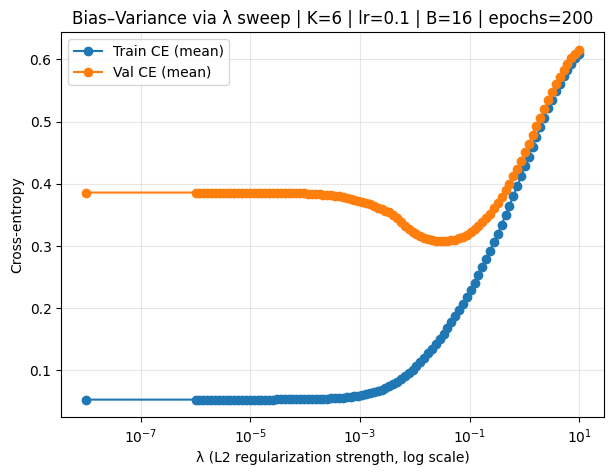

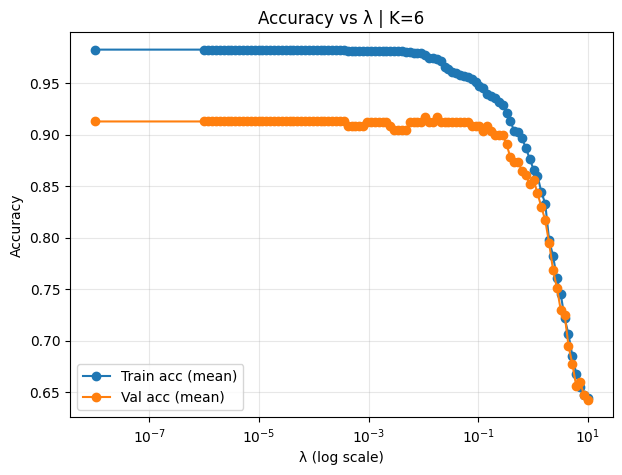

In [418]:
plt.figure(figsize=(7,5))

# avoid log(0): plot lambda=0 at a tiny x value
x = np.array(task3_df["lambda"].values, dtype=float)
x_plot = x.copy()
x_plot[x_plot == 0] = 1e-8

plt.plot(x_plot, task3_df["train_CE_mean"], marker="o", label="Train CE (mean)")
plt.plot(x_plot, task3_df["val_CE_mean"], marker="o", label="Val CE (mean)")

plt.xscale("log")
plt.xlabel("λ (L2 regularization strength, log scale)")
plt.ylabel("Cross-entropy")
plt.title(f"Bias–Variance via λ sweep | K={K_TASK3} | lr={TASK3_LR} | B={TASK3_B} | epochs={TASK3_EPOCHS}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Optional: accuracy plot
plt.figure(figsize=(7,5))
plt.plot(x_plot, task3_df["train_acc_mean"], marker="o", label="Train acc (mean)")
plt.plot(x_plot, task3_df["val_acc_mean"], marker="o", label="Val acc (mean)")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs λ | K={K_TASK3}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [ ]:

# Standardize using ALL TRAIN stats only (no leakage)
Xtr_std, Xte_std = standardize_train_test(
    np.asarray(X_train_raw, dtype=np.float64),
    np.asarray(X_test_raw, dtype=np.float64)
)
ytr = np.asarray(y_train_raw).astype(int).reshape(-1)
yte = np.asarray(y_test_raw).astype(int).reshape(-1)

final_model = LogisticRegressionSGD(
    lr=TASK3_LR,
    epochs=TASK3_EPOCHS,
    batch_size=TASK3_B,
    l2=best_lambda,
    seed=RANDOM_SEED
)
final_model.fit(Xtr_std, ytr, Xte_std, yte)

# Report test metrics
test_ce = final_model.test_ce_history[-1]
test_acc = final_model.test_acc_history[-1]
train_ce = final_model.train_ce_history[-1]
train_acc = final_model.train_acc_history[-1]

print("\nFINAL (retrain on full 5% train, eval on 95% test):")
print(f"Chosen λ = {best_lambda:g}")
print(f"Train: CE={train_ce:.4f}, acc={train_acc:.4f}")
print(f"Test : CE={test_ce:.4f}, acc={test_acc:.4f}")



FINAL (retrain on full 5% train, eval on 95% test):
Chosen λ = 0.033516
Train: CE=0.1671, acc=0.9565
Test : CE=0.3090, acc=0.9048


#### Task 4